In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import getcwd, path
import warnings
import string

# filter warnings(ONLY USE TEMPORARELY!)
warnings.filterwarnings("ignore")

# set dirs
homedir = path.expanduser('~')
reppath = path.join(homedir,"Projects","SAT Alcohol","Suppl_Files") # change to correct path
datadir = path.join(reppath,"data")

# load data
datafilepath = path.join(datadir, "SAT_singleMiniblocks.csv")
df = pd.read_csv(datafilepath, index_col=0, dtype={'ID':object})

# set labels
group_labels = np.array(["HC","AUD"])
df.group = group_labels[df.group]

# scale conditions as binary indicators
df["noise"]=df["noise"] - df["noise"].min()
df["steps"]=df["steps"] - df["steps"].min()

# add column for AUD categories
aud_cats = np.array(["non","mild","moderate","severe"])
df["aud_cat"] = (df.aud_sum // 2).clip(upper=4)
df["aud_cat_label"] = aud_cats[ df["aud_cat"] ]

# group by subjects
df_sbj = df.groupby(by=['group','ID','aud_cat_label']).mean().reset_index()

# group by steps condition
df_steps = df.groupby(by=['group','ID','aud_cat_label','steps']).mean().reset_index()
df_noise = df.groupby(by=['group','ID','aud_cat_label','noise']).mean().reset_index()

# set colors
aud_cat_palette = ['tab:blue','tab:green','tab:orange','tab:red']
#group_palette = ['orange','green']
group_palette = ['darkturquoise','salmon']

# set style of seaborn plots
sns.set_style("darkgrid", {"axes.facecolor": ".93"})

# helper function for letter annotation for subplots
def letter_annot_axes(axs, size=16, posx=-0.1, posy=1.1):
    axs = axs.flat
    for n, ax in enumerate(axs):         
        ax.text(posx, posy, string.ascii_uppercase[n], transform=ax.transAxes, size=size, weight='bold')


## Participant Sample

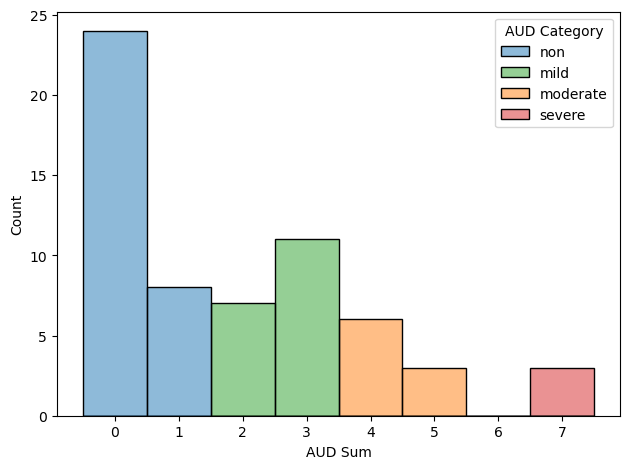

In [2]:
#%% plot historgram of AUD categories
ax = sns.histplot(data=df_sbj, x='aud_sum', hue='aud_cat_label', hue_order=aud_cats, 
                  discrete=True, palette=aud_cat_palette);
sns.move_legend(ax,"upper right",title="AUD Category");
ax.set_xlabel("AUD Sum");
plt.tight_layout()
#plt.savefig("aud_sum_hist.png", dpi=300)

## Inferred Model Parameters

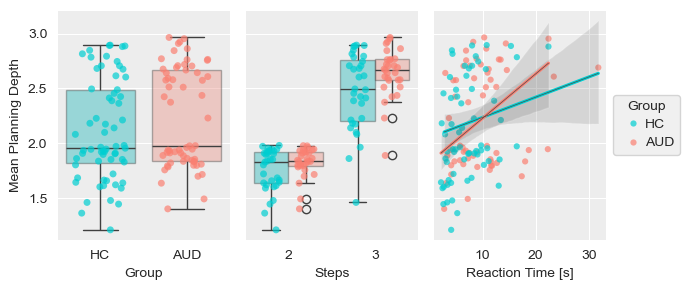

In [23]:
#%% plot Mean Planning Depth for groups and steps condition and correlation with SAT-RT
fig, ax = plt.subplots(1,3, figsize=(7,3), sharey=True);
g = sns.boxplot(  data=df_steps, y="MeanPD", x='group', order=group_labels, ax=ax[0], boxprops={'alpha': 0.4}, legend=False, palette=group_palette);
g = sns.stripplot(data=df_steps, y="MeanPD", x='group', order=group_labels, ax=ax[0], legend=False, palette=group_palette, alpha=.7, jitter=.3);
ax[0].set_ylabel('Mean Planning Depth');
ax[0].set_xlabel('Group');
g = sns.boxplot(  data=df_steps, y="MeanPD", x="steps", hue='group', hue_order=group_labels, ax=ax[1], boxprops={'alpha': 0.4}, legend=False, palette=group_palette);
g = sns.stripplot(data=df_steps, y="MeanPD", x="steps", hue='group', hue_order=group_labels, ax=ax[1], dodge=True, legend=False, palette=group_palette, alpha=.7, jitter=.2);
ax[1].set_xticklabels(('2','3'));
ax[1].set_xlabel('Steps');
g = sns.scatterplot(data=df_steps, y="MeanPD", x="SAT_RT", hue='group', hue_order=group_labels, ax=ax[2], palette=group_palette, alpha=0.7, edgecolors='none', s=20)
current_handles, current_labels = ax[2].get_legend_handles_labels()
ax[2].legend(current_handles, group_labels, loc='center left', labelspacing=0.4, handletextpad=-0.1, bbox_to_anchor=(1,0.5), title="Group")
g = sns.regplot( data=df_steps[df_steps.group == group_labels[1]], y="MeanPD", x="SAT_RT", ax=ax[2], color="0.3", scatter=False, line_kws={"lw":1});
g = sns.regplot( data=df_steps[df_steps.group == group_labels[0]], y="MeanPD", x="SAT_RT", ax=ax[2], color="0.3", scatter=False, line_kws={"lw":1});
g = sns.regplot( data=df_steps[df_steps.group == group_labels[1]], y="MeanPD", x="SAT_RT", ax=ax[2], color=group_palette[0], scatter=False, ci=0);
g = sns.regplot( data=df_steps[df_steps.group == group_labels[0]], y="MeanPD", x="SAT_RT", ax=ax[2], color=group_palette[1], scatter=False, ci=0);
g = sns.regplot( data=df_steps[df_steps.group == group_labels[1]], y="MeanPD", x="SAT_RT", ax=ax[2], color="0.3", scatter=False, line_kws={"lw":0.5}, ci=0);
g = sns.regplot( data=df_steps[df_steps.group == group_labels[0]], y="MeanPD", x="SAT_RT", ax=ax[2], color="0.3", scatter=False, line_kws={"lw":0.5}, ci=0);
ax[2].set_ylabel('')
ax[2].set_xlabel('Reaction Time [s]');
#letter_annot_axes(ax, size=plt.rcParams['font.size']+3, posx=-0.06, posy=1.03)

plt.tight_layout();
plt.savefig("mean_pd_groups_steps_rt.png", dpi=300);
plt.show();

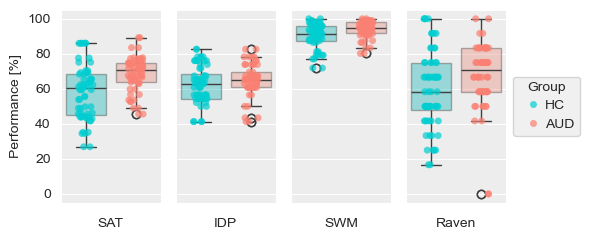

In [93]:
#%% plot Performances for all tasks
fig, ax = plt.subplots(1,4, figsize=(6,2.5), sharey=True)

for i,e in enumerate(["SAT_PER","IDP_PER","SWM_PER","Raven_PER"]):
    legend=True if i==3 else False
    g = sns.boxplot(  data=df_steps, y=e, x='group', order=group_labels,  ax=ax[i], boxprops={'alpha': 0.4}, legend=False, palette=group_palette);
    g = sns.stripplot(data=df_steps, y=e, x='group', hue='group', hue_order=group_labels,  ax=ax[i], legend=legend, palette=group_palette, alpha=.7, jitter=.15);
    ax[i].set_xlabel(e[:-4])
    ax[i].set_xticklabels(['',''])
    if i==0:
        ax[0].set_ylabel('Performance [%]')
    if legend:
        ax[i].legend(loc='center left', labelspacing=0.4, handletextpad=-0.1, bbox_to_anchor=(1,0.5), title="Group") 
ax[-1]
plt.tight_layout()
#letter_annot_axes(ax, size=plt.rcParams['font.size']+3, posx=-0.1, posy=1.03)
plt.savefig("performances.png", dpi=300)

plt.show()

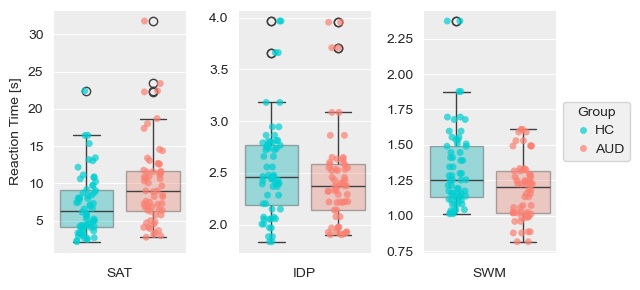

In [87]:
#%% plot Reaction times for all tasks
fig, ax = plt.subplots(1,3, figsize=(6.5,3), sharey=False)

for i,e in enumerate(["SAT_RT","IDP_RT","SWM_RT"]):
    legend=True if i==2 else False
    g = sns.boxplot(  data=df_steps, y=e, x='group', order=group_labels, ax=ax[i], boxprops={'alpha': 0.4}, legend=False, palette=group_palette);
    g = sns.stripplot(data=df_steps, y=e, x='group', hue='group', hue_order=group_labels,  ax=ax[i], legend=legend, palette=group_palette, alpha=.7, jitter=.15);
    ax[i].set_xlabel(e[:-3])
    ax[i].set_xticklabels(['',''])
    if i==0:
        ax[i].set_ylabel('Reaction Time [s]')
    else:
        ax[i].set_ylabel('')
    if legend: ax[i].legend(loc='center left', labelspacing=0.4, handletextpad=-0.1, bbox_to_anchor=(1,0.5), title="Group") 

plt.tight_layout()
plt.savefig("reaction_times.png", dpi=300)

plt.show()

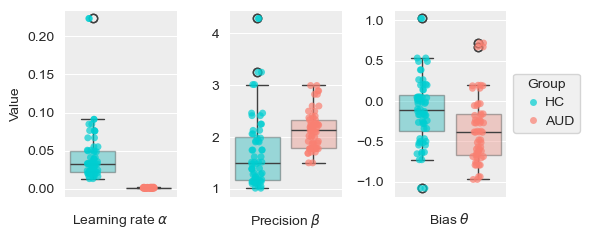

In [91]:
#%% plotSAT model parameters
fig, ax = plt.subplots(1,3, figsize=(6,2.5), sharey=False)

for i,e in enumerate(["model_alpha","model_beta","model_theta"]):
    legend=True if i==2 else False
    g = sns.boxplot(  data=df_steps, y=e, x='group', order=group_labels, ax=ax[i], boxprops={'alpha': 0.4}, legend=False, palette=group_palette);
    g = sns.stripplot(data=df_steps, y=e, x='group', hue='group', hue_order=group_labels, ax=ax[i], legend=legend, palette=group_palette, alpha=.7);
    ax[i].set_xlabel([r'Learning rate $\alpha$',r'Precision $\beta$',r'Bias $\theta$'][i])
    ax[i].set_xticklabels(['',''])
    if i==0: ax[i].set_ylabel('Value')
    else: ax[i].set_ylabel('')
    if legend: ax[i].legend(loc='center left', labelspacing=0.4, handletextpad=-0.1, bbox_to_anchor=(1,0.5), title="Group") 

plt.tight_layout()
plt.savefig("model_parameters.png", dpi=300)

plt.show()

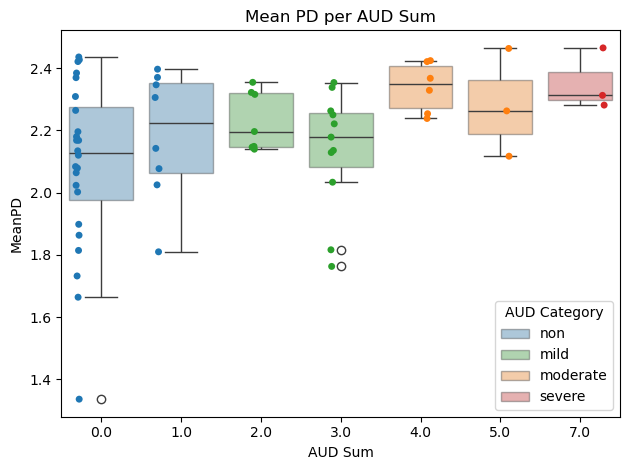

In [32]:
#%% plot Mean Planning Depth of AUD categories
fig, ax = plt.subplots()
g = sns.boxplot(  data=df_sbj, y="MeanPD", x="aud_sum", hue='aud_cat_label', ax=ax, boxprops={'alpha': 0.4}, palette=aud_cat_palette);
g = sns.stripplot(data=df_sbj, y="MeanPD", x="aud_sum", hue='aud_cat_label', ax=ax, dodge=True, legend=False, palette=aud_cat_palette);
ax.set_title('Mean PD per AUD Sum')
sns.move_legend(ax,"lower right",title="AUD Category");
ax.set_xlabel("AUD Sum");
plt.tight_layout()
plt.show()

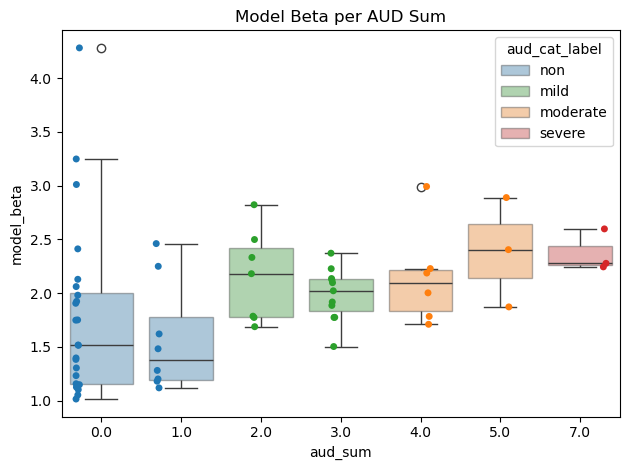

In [14]:
#%% plot beta parameter of AUD categories
fig, ax = plt.subplots()
g = sns.boxplot(  data=df_sbj, y="model_beta", x="aud_sum", hue='aud_cat_label', ax=ax, boxprops={'alpha': 0.4}, palette=aud_cat_palette);
g = sns.stripplot(data=df_sbj, y="model_beta", x="aud_sum", hue='aud_cat_label', ax=ax, dodge=True, legend=False, palette=aud_cat_palette);
ax.set_title('Model Beta per AUD Sum')
plt.tight_layout()
plt.show()

In [29]:
df_lmm = pd.read_csv(path.join(datadir,'lmm_qvalues_params.csv'),dtype={'ID':object}, sep=";")

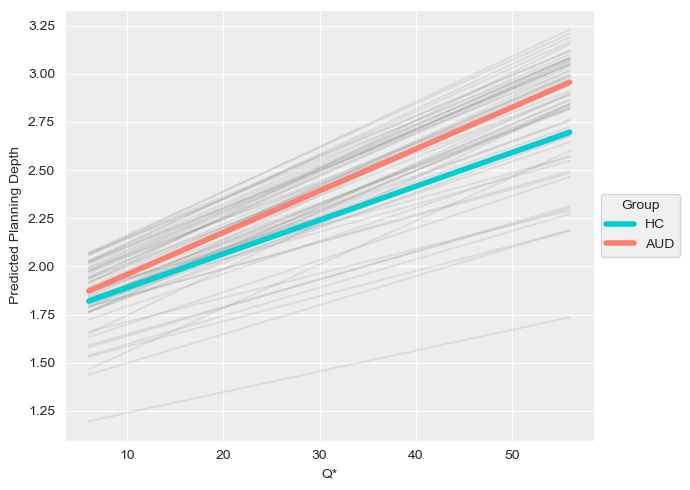

In [30]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=df_lmm, x='Qm', y='Pred', hue='id', palette=['grey'], alpha=0.15, legend=False, linewidth=1.5, ci=None)
ax = sns.lineplot(data=df_lmm, x='Qm', y='Pred', hue='group', palette=group_palette, linewidth=4, ci=None)
handles, labels = ax.get_legend_handles_labels()
for i,handle in enumerate(handles): handle.set_color(group_palette[i])
ax.legend(handles, loc='center left', bbox_to_anchor=(1,0.5), title="Group", labels=group_labels) 
handles, labels = ax.get_legend_handles_labels()
for i,handle in enumerate(handles): handle.set_color(group_palette[i])
ax.legend(handles, group_labels, loc='center left', bbox_to_anchor=(1,0.5), title="Group") 

# Plot-adjustments
plt.xlabel('Q*')
plt.ylabel('Predicted Planning Depth')

plt.tight_layout()

plt.savefig("lmm_qvalues_lineplot.png", dpi=300)
plt.show()

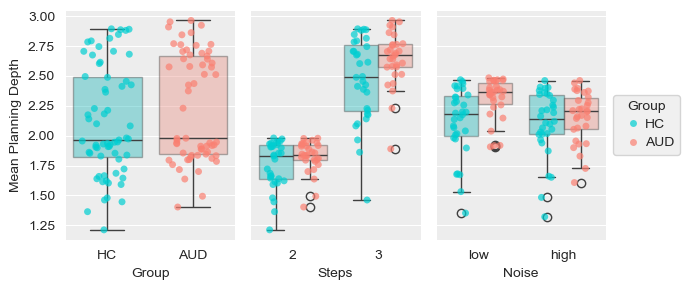

In [20]:
#%% plot Mean Planning Depth for groups and steps condition and correlation with SAT-RT
fig, ax = plt.subplots(1,3, figsize=(7,3), sharey=True);

g = sns.boxplot(  data=df_steps, y="MeanPD", x='group', order=group_labels, ax=ax[0], boxprops={'alpha': 0.4}, legend=False, palette=group_palette);
g = sns.stripplot(data=df_steps, y="MeanPD", x='group', order=group_labels, ax=ax[0], legend=False, palette=group_palette, alpha=.7, jitter=.3);
ax[0].set_ylabel('Mean Planning Depth');
ax[0].set_xlabel('Group');
g = sns.boxplot(  data=df_steps, y="MeanPD", x="steps", hue_order=group_labels, hue='group', ax=ax[1], boxprops={'alpha': 0.4}, legend=False, palette=group_palette);
g = sns.stripplot(data=df_steps, y="MeanPD", x="steps", hue_order=group_labels, hue='group', ax=ax[1], dodge=True, legend=False, palette=group_palette, alpha=.7, jitter=.2);
ax[1].set_xticklabels(('2','3'));
ax[1].set_xlabel('Steps');
g = sns.boxplot(  data=df_noise, y="MeanPD", x="noise", hue_order=group_labels, hue='group', ax=ax[2], boxprops={'alpha': 0.4}, legend=False, palette=group_palette);
g = sns.stripplot(data=df_noise, y="MeanPD", x="noise", hue_order=group_labels, hue='group', ax=ax[2], dodge=True, palette=group_palette, alpha=.7, jitter=.2);
ax[2].set_xticklabels(('low','high'));
ax[2].set_xlabel('Noise');

current_handles, current_labels = ax[2].get_legend_handles_labels()
ax[2].legend(current_handles, group_labels, loc='center left', labelspacing=0.4, handletextpad=-0.1, bbox_to_anchor=(1,0.5), title="Group")

plt.tight_layout();
plt.savefig("mean_pd_groups_steps_noise.png", dpi=300);
plt.show();